# BASICS OF PYTHON | SESSION 5

---
Sina Shafiezadeh | October 2024
---


Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Share your public repository** [HERE](https://docs.google.com/spreadsheets/d/1bveNOi9efLNgxqxh5uH5xhNG57bQ7DPCnG_sLAX4wmY/edit?usp=sharing).


# 1.&nbsp;Data Importing

In [67]:
import pandas as pd
import numpy as np

In [135]:
from google.colab import files


# Leggi il file CSV direttamente dal percorso dove è salvato
data = pd.read_csv("/content/data.csv")

# Visualizza le prime righe del DataFrame
print(data.head(5))

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1   

# 2.&nbsp;Data Cleaning (overview)

In [136]:
print(data.shape)

(2017, 17)


In [137]:
print(data.size)

34289


In [138]:
print(data.head(5)) # first 5 rows

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1   

In [139]:
print(data.tail(5)) # last 5 rows

      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
2012          0.002690    1    0.1290    -3.501     1        0.333   74.976   
2013          0.001670    1    0.0528    -2.663     1        0.131  110.041   
2014          0.003990    0    0.2140    -2.467     1        0.107  150.082   
2015          0.677000    1    0.0913    -2.735     1        0.133  150.011   
2016          0.000039    9    0.2180    -6.221     1        0.141  190.013   

      time_signature  valence  target                            song_title  \
2012             4.0    0.211  

In [140]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [141]:
print(data.describe())

        Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.

# 3.&nbsp;Data Cleaning (interpretability)

In [142]:
# to change the values of "duration_ms" time from milliseconds to minutes
# replace the new value in the column

data["duration_min"] = round(data["duration_ms"] / 60000, 2)

# Elimina la vecchia colonna "duration_ms"
data.drop(columns=["duration_ms"], inplace=True)

# Rinomina la colonna "duration_ms" in "duration_min"
data.rename(columns={"duration_ms": "duration_min"}, inplace=True)

print(data.head())


   Unnamed: 0  acousticness  danceability  energy  instrumentalness  key  \
0           0        0.0102         0.833   0.434          0.021900    2   
1           1        0.1990         0.743   0.359          0.006110    1   
2           2        0.0344         0.838   0.412          0.000234    2   
3           3        0.6040         0.494   0.338          0.510000    5   
4           4        0.1800         0.678   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   

   target      song_title            artist  duration_min  
0       1     

# 4.&nbsp;Data Cleaning (reduction)

In [143]:
data.drop(data.columns[[0]], axis=1, inplace=True) #drop a column
print(data)

      acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.01020         0.833   0.434          0.021900    2    0.1650   
1          0.19900         0.743   0.359          0.006110    1    0.1370   
2          0.03440         0.838   0.412          0.000234    2    0.1590   
3          0.60400         0.494   0.338          0.510000    5    0.0922   
4          0.18000         0.678   0.561          0.512000    5    0.4390   
...            ...           ...     ...               ...  ...       ...   
2012       0.00106         0.584   0.932          0.002690    1    0.1290   
2013       0.08770         0.894   0.892          0.001670    1    0.0528   
2014       0.00857         0.637   0.935          0.003990    0    0.2140   
2015       0.00164         0.557   0.992          0.677000    1    0.0913   
2016       0.00281         0.446   0.915          0.000039    9    0.2180   

      loudness  mode  speechiness    tempo  time_signature  valence  target

In [144]:
data.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'target', 'song_title', 'artist',
       'duration_min'],
      dtype='object')

# 5.&nbsp;Data Cleaning (noisy data)

In [147]:
# Mostra le righe corrispondenti ai 10 valori più alti nella colonna 'duration_min'
top_durations_info = data.nlargest(10, 'duration_min')
print("Le 10 canzoni con la durata più alta:")
print(top_durations_info[['song_title', 'artist', 'duration_min']])


Le 10 canzoni con la durata più alta:
                                             song_title  \
1535                                The Nearness of You   
695   Music Is the Answer - Original Extended 12-Inc...   
819                                 Southern Man - Live   
1603  Viola Sonata in C Minor: III. Andante con vari...   
1565                                      Gloomy Sunday   
335                                              Zombie   
404                     Who Is He And What Is He To You   
858                              Night on Bald Mountain   
304                              Night on Bald Mountain   
1602  String Quintet in C Major, Op. 29: II. Adagio ...   

                            artist  duration_min  
1535                 Joshua Redman         16.74  
695                         Celeda         14.17  
819   Crosby, Stills, Nash & Young         13.75  
1603             Felix Mendelssohn         13.07  
1565             Branford Marsalis         12.72  
335   

In [146]:
# Mostra le righe corrispondenti ai 10 valori più bassi nella colonna 'duration_min'
lowest_durations_info = data.nsmallest(10, 'duration_min')
print("Le 10 canzoni con la durata più bassa:")
print(lowest_durations_info[['song_title', 'artist', 'duration_min']])


Le 10 canzoni con la durata più bassa:
                                   song_title            artist  duration_min
1044             Zac Brown Band - Hot Country   Various Artists          0.27
1436                               dance alot   Various Artists          0.28
1591                       Little Green Apple       Tumble Tots          0.79
1583                         Peas Pudding Hot     The Kids Band          0.86
936                                     Aloha        Chris Bear          0.87
1530                   I'm a Fool to Want You  Passport Quartet          1.11
1594  Lyric Pieces, Book I Op. 12: I. Arietta      Edvard Grieg          1.37
804                  Just Wanna Love You Girl          Epsilons          1.38
1593                    Icy, Creamy Ice Cream            Barney          1.46
533                                    No Ass            FIDLAR          1.55


In [150]:
# Filtra il DataFrame per mantenere solo i valori di duration_min tra 1.30 e 11
data = data[(data['duration_min'] >= 1.30) & (data['duration_min'] <= 11)]

# Stampa il DataFrame risultante per verificare il risultato
print(data)


      acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.01020         0.833   0.434          0.021900    2    0.1650   
1          0.19900         0.743   0.359          0.006110    1    0.1370   
2          0.03440         0.838   0.412          0.000234    2    0.1590   
3          0.60400         0.494   0.338          0.510000    5    0.0922   
4          0.18000         0.678   0.561          0.512000    5    0.4390   
...            ...           ...     ...               ...  ...       ...   
2012       0.00106         0.584   0.932          0.002690    1    0.1290   
2013       0.08770         0.894   0.892          0.001670    1    0.0528   
2014       0.00857         0.637   0.935          0.003990    0    0.2140   
2015       0.00164         0.557   0.992          0.677000    1    0.0913   
2016       0.00281         0.446   0.915          0.000039    9    0.2180   

      loudness  mode  speechiness    tempo  time_signature  valence  target

# 6.&nbsp;Data Cleaning (completeness)

In [153]:
# Verifica se ci sono valori nulli nel DataFrame
null_counts = data.isnull().sum()

# Stampa il conteggio dei valori nulli per ogni colonna
print("Conteggio dei valori nulli per colonna:")
print(null_counts)

# Se ci sono valori nulli, eliminiamoli
if null_counts.any() > 0:
    data = data.dropna()
    print("\nValori nulli rimossi.")
else:
    print("\nNon ci sono valori nulli nel DataFrame.")


Conteggio dei valori nulli per colonna:
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
duration_min        0
dtype: int64

Non ci sono valori nulli nel DataFrame.


# 7.&nbsp;Data Exploring


In [160]:
# Define the columns to calculate the mean
columns_to_average = [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'duration_min'
]

# Calculate the mean for each column and round to 3 decimal places
mean_values = {col: round(data[col].mean(), 3) for col in columns_to_average}

# Print the mean values
for col, mean in mean_values.items():
    print(f"Mean of {col}: {mean}")


Mean of acousticness: 0.185
Mean of danceability: 0.619
Mean of energy: 0.683
Mean of instrumentalness: 0.132
Mean of liveness: 0.19
Mean of loudness: -7.051
Mean of speechiness: 0.093
Mean of duration_min: 4.079


# 8.&nbsp;Data Analysis

In [175]:

# Convert relevant columns to numeric, handling errors
for col in data.columns:
    if data[col].dtype == 'object':  # Check if column is of object type (likely string)
        try:
            data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric, replace errors with NaN
        except (ValueError, TypeError):
            print(f"Could not convert column '{col}' to numeric. Skipping for correlation.")

# Specify the columns you want to include in the correlation calculation
columns_of_interest = ['danceability', 'instrumentalness']

# Calculate the correlation matrix on the specified columns
correlation_matrix = data[columns_of_interest].corr()

# Mask the diagonal to avoid displaying correlations of 1
np.fill_diagonal(correlation_matrix.values, np.nan)

print(correlation_matrix)


                  danceability  instrumentalness
danceability               NaN           -0.1220
instrumentalness       -0.1220               NaN


# 9.&nbsp;Data Visualization

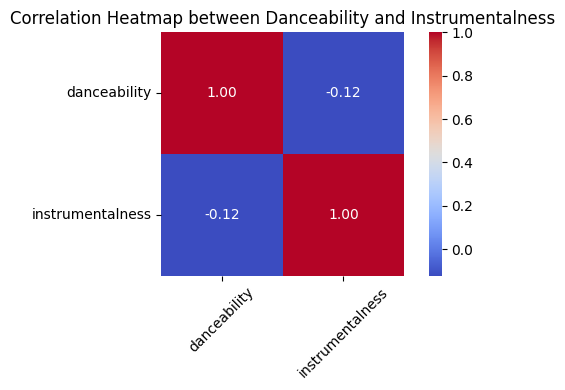

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation for demonstration (replace this with your actual DataFrame)
# data = pd.read_csv('your_data.csv')  # Load your data here

# Convert relevant columns to numeric, handling errors
for col in data.columns:
    if data[col].dtype == 'object':  # Check if column is of object type (likely string)
        try:
            data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric, replace errors with NaN
        except (ValueError, TypeError):
            print(f"Could not convert column '{col}' to numeric. Skipping for correlation.")

# Select specific columns for correlation calculation
columns_to_correlate = ['danceability', 'instrumentalness']
correlation_matrix = data[columns_to_correlate].corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f', cbar=True)

# Set the title and labels
plt.title('Correlation Heatmap between Danceability and Instrumentalness')
plt.xticks(ticks=[0.5, 1.5], labels=columns_to_correlate, rotation=45)
plt.yticks(ticks=[0.5, 1.5], labels=columns_to_correlate, rotation=0)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


# 10.&nbsp;Data Exporting

In [178]:
# Save the heatmap as a file
plt.savefig('correlations.png', format='png', bbox_inches='tight')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# Download the saved heatmap image
files.download('correlations.png')

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>